# Leistungsbeurteilung 259
## Teil 3


In [1]:
import pandas as pd
import os 

weather_df = pd.read_csv(os.path.join('dataset-weather2.csv'))
weather_df.head()

,Datum,Niederschlag in mm,Niederschlag in mm am Vortag,Niederschlag in mm am nächsten Tag
0,1/2/1948,14.986,11.938,10.668
1,1/3/1948,10.668,14.986,7.874
2,1/4/1948,7.874,10.668,4.318
3,1/5/1948,4.318,7.874,11.176
4,1/6/1948,11.176,4.318,10.414


In [2]:
# NaN-Werte entfernen
weather_df = weather_df.dropna()

# Datumsformat konvertieren
weather_df['Datum'] = pd.to_datetime(weather_df['Datum'])

weather_df.head()
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25549 entries, 0 to 25548
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Datum                               25549 non-null  datetime64[ns]
 1   Niederschlag in mm                  25549 non-null  float64       
 2   Niederschlag in mm am Vortag        25549 non-null  float64       
 3   Niederschlag in mm am nächsten Tag  25549 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 798.5 KB


In [3]:
import datetime as dt

weather_df['Datum'] = pd.to_datetime(weather_df['Datum'])
weather_df['Datum']= weather_df['Datum'].map(dt.datetime.toordinal)

features = ['Datum', 'Niederschlag in mm', 'Niederschlag in mm am Vortag']
target = ['Niederschlag in mm am nächsten Tag']

X = weather_df[features]
y = weather_df[target]

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25549 entries, 0 to 25548
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Datum                         25549 non-null  int64  
 1   Niederschlag in mm            25549 non-null  float64
 2   Niederschlag in mm am Vortag  25549 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 598.9 KB


# 3.1
Einteilung in *test* und *train*

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X_train), len(X_test)

(20439, 5110)

# 3.2

Ich denke, dass sich für die Vorhersage von Niederschlagsmengen der lineare Regressionsalgorithmus aus  scikit-learn eignet. Dieser Algorithmus hilft dabei, den Zusammenhang zwischen verschiedenen Faktoren wie Datum, Niederschlagsmengen und den Mengen in den vorherigen Tagen zu verstehen und darauf basierend eine Vorhersage zu treffen, wie viel Niederschlag am nächsten Tag fallen wird. Ausserdem denke ich, dass es nicht viele Outliner durch diesen Algorithmus geben wird.

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 3.3
Es wurde ein Vergleich zwischen den ersten zehn Vorhersagen des Modells für den Niederschlag in mm am nächsten Tag und den tatsächlichen Werten aus dem Testdatensatz durchgeführt. Da die Unterschiede zwischen den tatsächlichen Werten und den Vorhersagen gering sind, scheinen die Vorhersagen im Allgemeinen vernünftig zu sein. 

Es gab jedoch einige Fälle, in denen die Vorhersagen und die tatsächlichen Werte erheblich voneinander abwichen. In der siebten Beobachtung sagte das Modell einen Niederschlag von 5,27 mm vorher, aber der tatsächliche Wert betrug 25,65 mm. Insgesamt scheint das Modell jedoch eine akzeptable Leistung zu zeigen und könnte für weitere Vorhersagen auf ähnlichen Datensätzen verwendet werden. 

In [20]:
# Vorhersagen auf dem Testdatensatz machen
y_pred = model.predict(X_test)

# DataFrame aus Vorhersagen erstellen
y_pred_df = pd.DataFrame(y_pred, columns=['Vorhergesagte Werte'])

# DataFrame mit tatsächlichen Werten erstellen
y_test_df = pd.DataFrame(y_test, columns=['Niederschlag in mm am nächsten Tag'])

# Index von y_test_df zurücksetzen (sonst kann die Tabelle nicht kombiniert werden, siehe nächster
# Schritt)
y_test_df = y_test_df.reset_index(drop=True)

# DataFrames nebeneinander anzeigen
combined_df = pd.concat([y_pred_df, y_test_df], axis=1)
combined_df.head(10)

,Vorhergesagte Werte,Niederschlag in mm am nächsten Tag
0,2.020974,9.652
1,1.731687,0.000
2,1.732720,0.000
3,1.734715,0.000
4,2.523126,1.524
5,1.733382,0.000
6,4.941574,2.286
7,5.273850,25.654
8,1.783605,0.000
9,1.735015,0.000


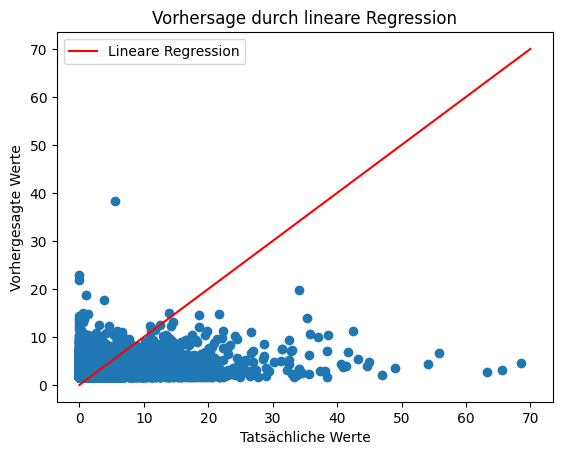

In [21]:
# Das folgende Diagramm soll die Gerade der Linearen Regression zeigen. Dabei gilt, dass jeder Punkt,
# welcher auf dieser Gerade liegt, richtig vorhergesagt wurde.

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Vorhersage durch lineare Regression')

x = np.linspace(0, 70, 100)
plt.plot(x, x, '-r', label='Lineare Regression')


plt.legend()
plt.show()
